Simple Line

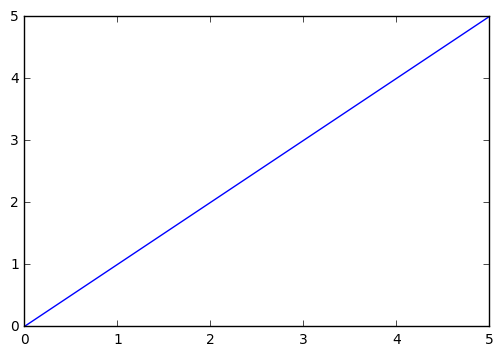

[1 2 3 4 5 6]


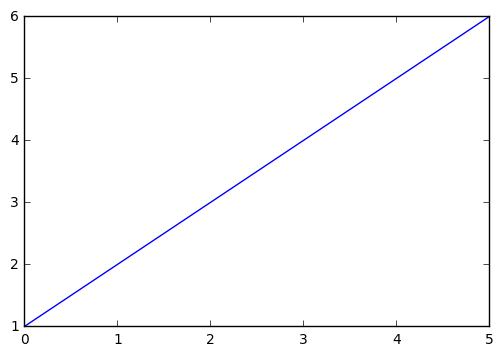

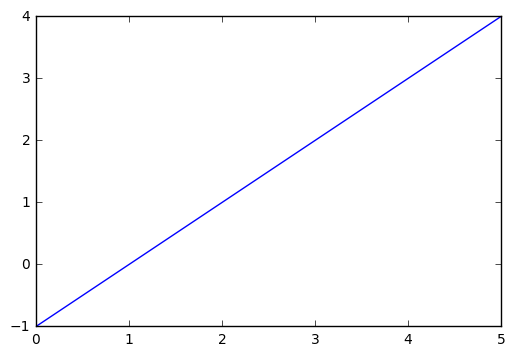

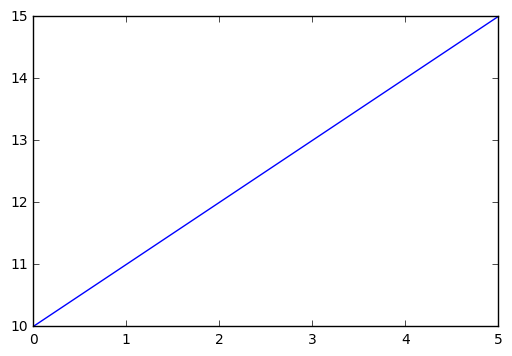

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [0, 1, 2, 3, 4, 5]
# Going by our formula, every y value at a position is the same as the x-value in the same position.
# We could write y = x, but let's write them all out to make this more clear.
y = [0, 1, 2, 3, 4, 5]

# As you can see, this is a straight line that passes through the points (0,0), (1,1), (2,2), and so on.
plt.plot(x, y)
plt.show()

# Let's try a slightly more ambitious line.
# What if we did y = x + 1?
# We'll make x an array now, so we can add 1 to every element more easily.
x = np.asarray([0, 1, 2, 3, 4, 5])
y = x + 1

# y is the same as x, but every element has 1 added to it.
print(y)
# This plot passes through (0,1), (1,2), and so on.
# It's the same line as before, but shifted up 1 on the y-axis.
plt.plot(x, y)
plt.show()

# By adding 1 to the line, we moved what's called the y-intercept -- where the line intersects with the y-axis.
# Moving the intercept can shift the whole line up (or down when we subtract).
y=x - 1
plt.plot(x,y)
plt.show()

y = x + 10
plt.plot(x,y)
plt.show()

Working with slope

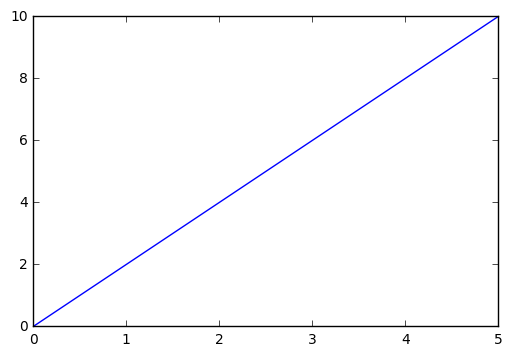

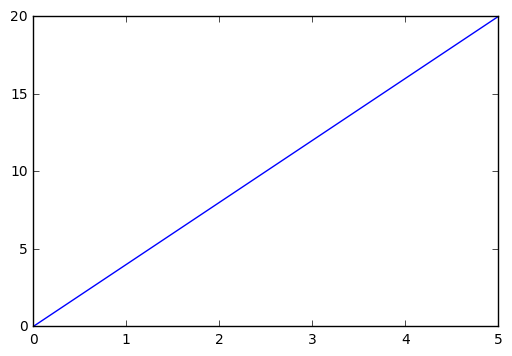

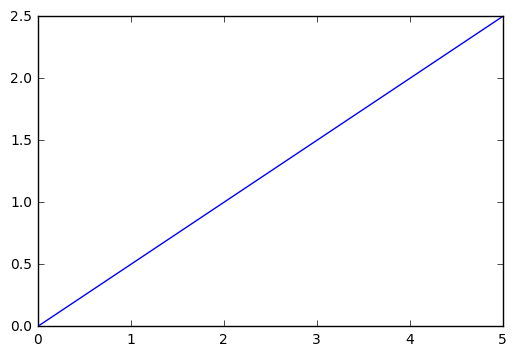

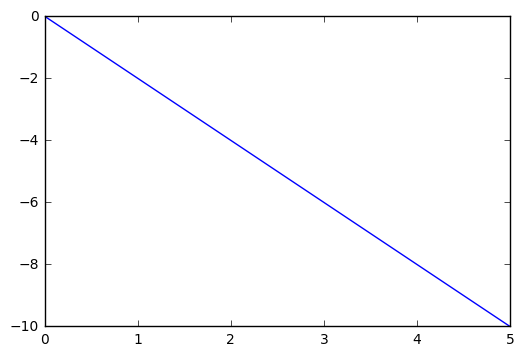

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.asarray([0, 1, 2, 3, 4, 5])
# Let's set the slope of the line to 2.
y = 2 * x

# See how this line is "steeper" than before?  The larger the slope is, the steeper the line becomes.
# On the flipside, fractional slopes will create a "shallower" line.
# Negative slopes will create a line where y values decrease as x values increase.
plt.plot(x, y)
plt.show()
y = 4*x
plt.plot(x,y)
plt.show()
y = 0.5*x
plt.plot(x,y)
plt.show()
y=-2*x
plt.plot(x,y)
plt.show()

linear regression -- The r-value indicates how correlated two variables are. This can range from no correlation to a negative correlation to a positive correlation.The more correlated two variables are, the easier it becomes to use one to predict the other.
The equation to create the formula takes the form Y=mx+b
This equation is saying "the predicted value of the second variable (y) is equal to the value of the first variable (x) times the slope (m) plus the intercept (b)".
Slope -- covariance of x and y divided by the variance of x.
Intercept-we just take the mean of the y values, and then subtract the slope times the mean of the x values from that

In [3]:
import pandas as pd
wine_quality=pd.read_csv('wine_quality_white.csv')

In [4]:
from numpy import cov
slope_density=cov(wine_quality["density"],wine_quality["quality"])[0,1]/wine_quality["density"].var()

In [5]:
from numpy import cov

# This function will take in two columns of data, and return the slope of the linear regression line.
def calc_slope(x, y):
    return cov(x, y)[0, 1] / x.var()
mean_of_x=wine_quality["density"].mean()
mean_of_y=wine_quality["quality"].mean()
slope_x_y=calc_slope(wine_quality["density"],wine_quality["quality"])
intercept_density=mean_of_y - slope_x_y* mean_of_x

Making predictions

In [8]:
from numpy import cov

def calc_slope(x, y):
    return cov(x, y)[0, 1] / x.var()

# Calculate the intercept given the x column, y column, and the slope
def calc_intercept(x, y, slope):
    return y.mean() - (slope * x.mean())

x=wine_quality["density"]
y=wine_quality["quality"]
slope=calc_slope(x, y)
intercept=calc_intercept(x, y, slope)
def calc_prediction(x):
    y_predict=slope*x+intercept
    return y_predict
predicted_quality=wine_quality["density"].apply(calc_prediction)


Finding error - linregress function makes it simple to do linear regression.

In [10]:
from scipy.stats import linregress

# We've seen the r_value before -- we'll get to what p_value and stderr_slope are soon -- for now, don't worry about them.
slope, intercept, r_value, p_value, stderr_slope = linregress(wine_quality["density"], wine_quality["quality"])
# As you can see, these are the same values we calculated (except for slight rounding differences)
print(slope)
print(intercept)
#method to calc predicted value
def cal_predict_value(x):
    y_pred=x*slope+intercept
    return y_pred
#we get a series of predicted values
predicted_quality=wine_quality["density"].apply(cal_predict_value)
#to calcualte residual sum of squares , we have to subtract each #predict value with 
#already existing value and square them and #sum it
def calc_rss(original_y_value,predicted_y_value):
    sum_of_squares=0
    for i in range(0,len(original_y_value)):
        diff=original_y_value[i]-predicted_y_value[i]
        square_diff=diff **2
        sum_of_squares+=square_diff
    return sum_of_squares
rss=calc_rss(wine_quality["quality"],predicted_quality)

-90.9423999421
96.2771445761


Standard error - From the sum of squared residuals, we can find the standard error. The standard error is similar to the standard deviation, but it tries to make an estimate for the whole population of y-values -- even the ones we haven't seen yet that we may want to predict in the future.
The standard error lets us quickly determine how good or bad a linear model is at prediction.


In [24]:
from scipy.stats import linregress
import numpy as np

# We can do our linear regression
# Sadly, the stderr_slope isn't the standard error, but it is the standard error of the slope fitting only
# We'll need to calculate the standard error of the equation ourselves
slope, intercept, r_value, p_value, stderr_slope = linregress(wine_quality["density"], wine_quality["quality"])
predicted_y = np.asarray([slope * x + intercept for x in wine_quality["density"]])
residuals = (wine_quality["quality"] - predicted_y) ** 2
rss = sum(residuals)
##calcalating std error
stderr = (rss / (len(wine_quality["quality"]) - 2)) ** .5

def within_percentage(y, predicted_y, stderr, error_count):
    within = stderr * error_count
    differences = abs(predicted_y - y)
    lower_differences = [d for d in differences if d <= within]
    within_count = len(lower_differences)
    return within_count / len(y)
within_one = float(within_percentage(wine_quality["quality"],predicted_y, stderr, 1))
within_two = within_percentage(wine_quality["quality"], predicted_y, stderr, 2)
within_three =within_percentage(wine_quality["quality"], predicted_y, stderr, 3)

